In [ ]:
!pip install tensorflow

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
#import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.2


In [3]:
df_train = pd.read_csv('grammer_error_dataset/train.csv')
df_val = pd.read_csv('grammer_error_dataset/test.csv')

In [ ]:
unique,counts = np.unique(df_train.grammatically_incorrect,return_counts = True)

In [ ]:
unq,cnt = np.unique(df_val.grammatically_incorrect,return_counts = True)

In [ ]:
counts,cnt

(array([9524, 2851]), array([539, 158]))

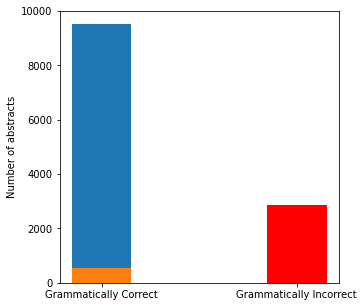

In [ ]:
from pandas._libs.algos import pad
fig, ax = plt.subplots(1,1,figsize=(5,5))

barlist = ax.bar(['Grammatically Correct','Grammatically Incorrect'],counts,width=0.3)
barlist_2 = ax.bar(['Grammatically Correct','Grammatically Incorrect'],cnt,width=0.3)
barlist[1].set_color('r')
barlist_2[1].set_color('r')
#ax.set_title('Number of Grammatically Correct/Incorrect abstracts',pad=30)
ax.set_ylabel('Number of abstracts')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()
fig.savefig('foo.png',bbox_inches='tight')

### Visualize Co-occurance

In [ ]:
cooccurrence_matrix= np.dot(arr_err.transpose(),arr_err)
cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
with np.errstate(divide='ignore', invalid='ignore'):
    cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal[:, None]))


In [ ]:
import seaborn as sns

In [ ]:
np.dot(arr_err.transpose(),arr_err)

array([[880, 223, 224, 223, 213],
       [223, 965, 255, 243, 259],
       [224, 255, 948, 242, 250],
       [223, 243, 242, 956, 231],
       [213, 259, 250, 231, 943]])

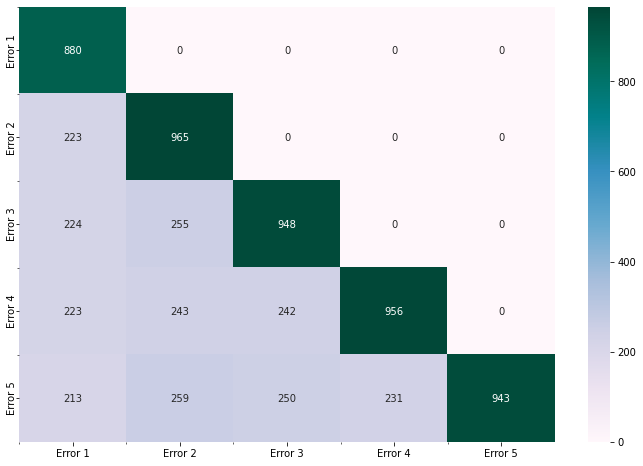

In [ ]:
label_headers = ['Error 1','Error 2','Error 3','Error 4','Error 5']
plt.figure(figsize=(12,8))
ax= plt.subplot()
sns.heatmap(corr_mat, annot=True, ax = ax,fmt='g',cmap='PuBuGn'); #annot=True to annotate cells
sns.set(font_scale=1.4)
# labels, title and ticks
#ax.set_title('Confusion Matrix - Coarse-grained Classification',pad = 30).set_fontsize('20')
ax.set_xticks(np.arange(len(label_headers)),minor=True)
ax.set_yticks(np.arange(len(label_headers)),minor=True)

ax.set_xticklabels(label_headers,ha='center')
ax.set_yticklabels(label_headers,ha='center')

plt.savefig('cm.png',bbox_inches='tight')

In [ ]:
unq,cnt = np.unique(np.array([''.join(row) for row in arr_err.astype(str).tolist()]),return_counts=True)

In [ ]:
dict_labels = dict(zip(unq,cnt))

In [ ]:
# Err1
keys_with_err1 = np.where(np.char.startswith(unq,'1'))

for i in keys_with_err1:
  print(unq[i])


['10000' '10001' '10010' '10011' '10100' '10101' '10110' '10111' '11000'
 '11001' '11010' '11011' '11100' '11101' '11110' '11111']


In [ ]:
# The device name should look like the following:
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

SystemError: ignored

In [ ]:
import torch

if torch.cuda.is_available():        
    device = torch.device("cuda")
    print('GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using CPU instead.')
    device = torch.device("cpu")

GPU: Tesla T4


In [ ]:
print(torch.__version__)

1.12.1+cu113


In [ ]:
!pip install git+https://github.com/huggingface/transformers

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('anferico/bert-for-patents')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/329k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/327 [00:00<?, ?B/s]

###**1. Coarse-grained Classification**

In [ ]:
sentences = df_train.abstracts.values
labels = df_train.grammatically_incorrect.values
sentences_val = df_val.abstracts.values
labels_val = df_val.grammatically_incorrect.values

In [ ]:
print(' Original: ', sentences[0])

print('Tokenized: ', tokenizer.tokenize(sentences[0]))

print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  disclosed is a composition and method for reducing cravings for a craved substance , particularly foods , with preparations containing 5 - hydroxytryptophan . the 5 - htp is added to the same or similar substance that is actually craved to reduce the craving for the craved substance while further satisfying the craving by consumption of a reduced amount of the craved substance .
Tokenized:  ['disclosed', 'is', 'a', 'composition', 'and', 'method', 'for', 'reducing', 'craving', '##s', 'for', 'a', 'craved', 'substance', ',', 'particularly', 'foods', ',', 'with', 'preparations', 'containing', '5', '-', 'hydroxy', '##try', '##pt', '##op', '##han', '.', 'the', '5', '-', 'h', '##tp', 'is', 'added', 'to', 'the', 'same', 'or', 'similar', 'substance', 'that', 'is', 'actually', 'craved', 'to', 'reduce', 'the', 'craving', 'for', 'the', 'craved', 'substance', 'while', 'further', 'satisfying', 'the', 'craving', 'by', 'consumption', 'of', 'a', 'reduced', 'amount', 'of', 'the', 'craved', '

In [ ]:
input_ids = []
attention_masks = []


for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 64,          
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',  
                   )
    
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])


input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2301: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  disclosed is a composition and method for reducing cravings for a craved substance , particularly foods , with preparations containing 5 - hydroxytryptophan . the 5 - htp is added to the same or similar substance that is actually craved to reduce the craving for the craved substance while further satisfying the craving by consumption of a reduced amount of the craved substance .
Token IDs: tensor([    2, 21027,  1668,  1042,  5177,  1663,  3783,  1670,  7826, 26034,
         1680,  1670,  1042, 24820,  9080,  1015,  3056,  9105,  1015,  1672,
        12594,  4485,  1024,  1016, 29961, 10794, 13541,  7026,  4484,  1017,
         1661,  1024,  1016,  1049, 25521,  1668,  2459,  1665,  1661,  1833,
         1695,  2379,  9080,  1673,  1668,  2606, 24820,  1665,  5212,  1661,
        26034,  1670,  1661, 24820,  9080,  1761,  2247, 16752,  1661, 26034,
         1676,  8046,  1662,     3])


In [ ]:
input_ids_val = []
attention_masks_val = []

# For every sentence...
for sent in sentences_val:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
  
    input_ids_val.append(encoded_dict['input_ids'])
    attention_masks_val.append(encoded_dict['attention_mask'])

input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)
labels_val = torch.tensor(labels_val)

print('Original: ', sentences_val[0])
print('Token IDs:', input_ids_val[0])

Original:  a process for granulating ammonium phosphate containing composition for use as a fertilizer which comprises feeding a slurry or melt of ammonium phosphate , wherein said slurry or melt is capable of further reaction with ammonia , into a kneading mill , feeding recycled particles from the subsequent classification and crushing procedure into said kneading mill , wherein the said slurry or melt added to the mill is from 5 to 95 % wt . of the total slurry or melt , feeding ammonia into said mill to react with at least a portion of the reactable components of said slurry or melt , generating a heat of reaction , subjecting said mixture to a kneading action within said mill until the heat of reaction and the kneading action cause a repeated disposition of fertilizer material onto the solids and cause a repeated drying of said deposit , passing the product from said kneading mill into a rotary drum granulator , feeding additional ammonium phosphate containing slurry or melt to a 

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
train_dataset = TensorDataset(input_ids, attention_masks, labels)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32


train_dataloader = DataLoader(
            train_dataset, 
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size 
        )


validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=7352449c11d29635b587d675c45a5f6bdf933a60fc574782bb579ae72ee34b93
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
from torchviz import make_dot

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    
    num_labels = 2, 
                   
    output_attentions = False, 
    output_hidden_states = False, 
)

model.cuda()

Downloading:   0%|          | 0.00/1.38G [00:00<?, ?B/s]

Some weights of the model checkpoint at anferico/bert-for-patents were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(39859, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,), eps=1

In [ ]:
for i,batch in enumerate(train_dataloader):
  
  if i == 0:
    yhat = model(batch[0].to(device),token_type_ids=None,attention_mask=batch[1].to(device),labels=batch[2].to(device))
    make_dot(yhat[1], params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")
  else:
    break

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.513533 to fit


In [ ]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 393 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (39859, 1024)
bert.embeddings.position_embeddings.weight               (512, 1024)
bert.embeddings.token_type_embeddings.weight               (2, 1024)
bert.embeddings.LayerNorm.weight                             (1024,)
bert.embeddings.LayerNorm.bias                               (1024,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight        (1024, 1024)
bert.encoder.layer.0.attention.self.query.bias               (1024,)
bert.encoder.layer.0.attention.self.key.weight          (1024, 1024)
bert.encoder.layer.0.attention.self.key.bias                 (1024,)
bert.encoder.layer.0.attention.self.value.weight        (1024, 1024)
bert.encoder.layer.0.attention.self.value.bias               (1024,)
bert.encoder.layer.0.attention.output.dense.weight      (1024, 1024)
bert.encoder.layer.0.attention.output.dense.bias             (

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 1e-5, 
                  eps = 1e-8
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup


epochs = 2

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

In [ ]:
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


training_stats = []

total_t0 = time.time()

for epoch_i in range(0, epochs):
    
  

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

     
        model.zero_grad()        

        outputs = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]
    
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
    print("")
    print("Running Validation...")

    t0 = time.time()
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        with torch.no_grad():    
            outputs = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = outputs[0]
            logits = outputs[1]
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.4f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.4f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    387.    Elapsed: 0:00:48.
  Batch    80  of    387.    Elapsed: 0:01:35.
  Batch   120  of    387.    Elapsed: 0:02:25.
  Batch   160  of    387.    Elapsed: 0:03:13.
  Batch   200  of    387.    Elapsed: 0:04:02.
  Batch   240  of    387.    Elapsed: 0:04:51.
  Batch   280  of    387.    Elapsed: 0:05:40.
  Batch   320  of    387.    Elapsed: 0:06:29.
  Batch   360  of    387.    Elapsed: 0:07:18.

  Average training loss: 0.14
  Training epcoh took: 0:07:51

Running Validation...
  Accuracy: 0.9787
  Validation Loss: 0.0810
  Validation took: 0:00:09

======== Epoch 2 / 2 ========
Training...
  Batch    40  of    387.    Elapsed: 0:00:49.
  Batch    80  of    387.    Elapsed: 0:01:38.
  Batch   120  of    387.    Elapsed: 0:02:27.
  Batch   160  of    387.    Elapsed: 0:03:15.
  Batch   200  of    387.    Elapsed: 0:04:04.
  Batch   240  of    387.    Elapsed: 0:04:53.
  Batch   280  of    387.    Elapsed: 0:05:42.
  Bat

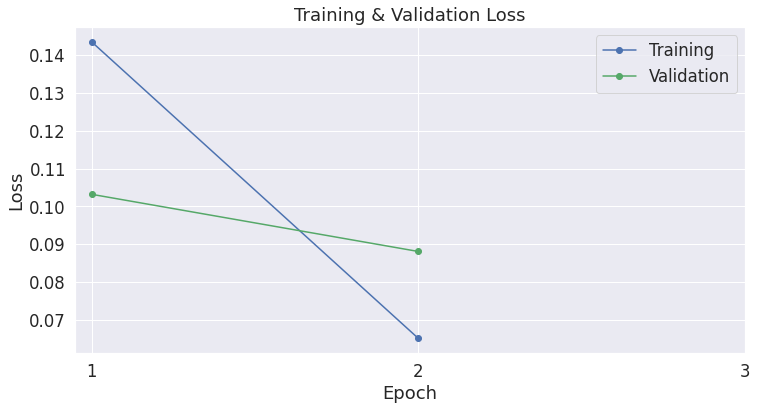

<Figure size 864x432 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])

plt.show()
plt.savefig('loss.png')

In [ ]:
# Load the dataset into a pandas dataframe.
#df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/thesis_PQAI/grammer_error_dataset/test.csv')

with open('/content/drive/MyDrive/Colab Notebooks/thesis_PQAI/Relevancy_checker/queries.txt','r') as file:
  queries = file.readlines()
queries_formatted = []
for i in queries:
  queries_formatted.append(i.strip())
fake_labels = np.zeros(len(queries_formatted))
sentences = queries_formatted
#labels_test = df_test.grammatically_incorrect.values
labels_test = fake_labels

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids_test = []
attention_masks_test = []

# For every sentence...
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_test.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_test.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_test = torch.cat(input_ids_test, dim=0)
attention_masks_test = torch.cat(attention_masks_test, dim=0)
labels_test = torch.tensor(labels_test)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids_test, attention_masks_test,labels_test)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids_test)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  #label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

Predicting labels for 21 test sentences...


In [ ]:
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,accuracy_score,f1_score

In [ ]:
print(classification_report(flat_true_labels, flat_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       539
           1       0.97      0.94      0.95       158

    accuracy                           0.98       697
   macro avg       0.97      0.96      0.97       697
weighted avg       0.98      0.98      0.98       697



In [ ]:
print(precision_score(flat_true_labels,flat_predictions))

0.9308176100628931


In [ ]:
print(recall_score(flat_true_labels,flat_predictions))

0.9367088607594937


In [ ]:
print(accuracy_score(flat_true_labels,flat_predictions))

0.96987087517934


In [ ]:
f1_score(flat_true_labels,flat_predictions)

0.9337539432176657

In [ ]:
import seaborn as sns

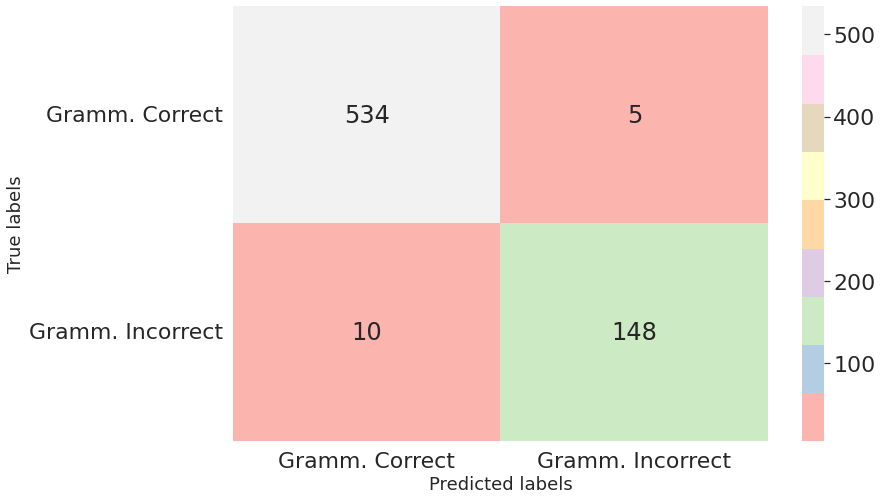

In [ ]:
plt.figure(figsize=(12,8))
ax= plt.subplot()
sns.heatmap(confusion_matrix(flat_true_labels,flat_predictions), annot=True, ax = ax,fmt='g',cmap='Pastel1'); #annot=True to annotate cells
sns.set(font_scale=2)
# labels, title and ticks
ax.set_xlabel('Predicted labels').set_fontsize('18')
ax.set_ylabel('True labels').set_fontsize('18')
#ax.set_title('Confusion Matrix - Coarse-grained Classification',pad = 30).set_fontsize('20')
ax.xaxis.set_ticklabels(['Gramm. Correct','Gramm. Incorrect'],rotation=0)
ax.yaxis.set_ticklabels(['Gramm. Correct','Gramm. Incorrect'],rotation=0)
plt.savefig('cm.png',bbox_inches='tight')


###2. Fine-grained Classification

In [ ]:
sentences = df_train.abstracts.values
labels = df_train[['err_1','err_2','err_3','err_4','err_5']].values
sentences_val = df_val.abstracts.values
labels_val = df_val[['err_1','err_2','err_3','err_4','err_5']].values

In [ ]:
labels_val

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2299: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  disclosed is a composition and method for reducing cravings for a craved substance , particularly foods , with preparations containing 5 - hydroxytryptophan . the 5 - htp is added to the same or similar substance that is actually craved to reduce the craving for the craved substance while further satisfying the craving by consumption of a reduced amount of the craved substance .
Token IDs: tensor([    2, 21027,  1668,  1042,  5177,  1663,  3783,  1670,  7826, 26034,
         1680,  1670,  1042, 24820,  9080,  1015,  3056,  9105,  1015,  1672,
        12594,  4485,  1024,  1016, 29961, 10794, 13541,  7026,  4484,  1017,
         1661,  1024,  1016,  1049, 25521,  1668,  2459,  1665,  1661,  1833,
         1695,  2379,  9080,  1673,  1668,  2606, 24820,  1665,  5212,  1661,
        26034,  1670,  1661, 24820,  9080,  1761,  2247, 16752,  1661, 26034,
         1676,  8046,  1662,     3])


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids_val = []
attention_masks_val = []

# For every sentence...
for sent in sentences_val:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)
labels_val = torch.tensor(labels_val)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences_val[0])
print('Token IDs:', input_ids_val[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2299: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  a process for granulating ammonium phosphate containing composition for use as a fertilizer which comprises feeding a slurry or melt of ammonium phosphate , wherein said slurry or melt is capable of further reaction with ammonia , into a kneading mill , feeding recycled particles from the subsequent classification and crushing procedure into said kneading mill , wherein the said slurry or melt added to the mill is from 5 to 95 % wt . of the total slurry or melt , feeding ammonia into said mill to react with at least a portion of the reactable components of said slurry or melt , generating a heat of reaction , subjecting said mixture to a kneading action within said mill until the heat of reaction and the kneading action cause a repeated disposition of fertilizer material onto the solids and cause a repeated drying of said deposit , passing the product from said kneading mill into a rotary drum granulator , feeding additional ammonium phosphate containing slurry or melt to a 

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
train_dataset = TensorDataset(input_ids, attention_masks, labels)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
val_dataset[0]

(tensor([    2,  1042,  2497,  1670, 12269, 10589, 30003, 17009,  4485,  5177,
          1670,  1889,  1669,  1042, 31787,  1694,  8346,  8186,  1042, 30111,
          1695, 14564,  1662, 30003, 17009,  1015, 16391,  1721, 30111,  1695,
         14564,  1668,  4879,  1662,  2247,  4333,  1672, 25539,  1015,  1711,
          1042, 32076,  4636,  1015,  8186, 21872,  8974,  1678,  1661,  4410,
          5244,  1663, 14192,  7374,  1711,  1721, 32076,  4636,  1015, 16391,
          1661,  1721, 30111,     3]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 tensor([0, 0, 0, 0, 0]))

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

NameError: ignored

In [ ]:
from transformers import BertModel, AdamW, BertConfig

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class FineGrainedBertClassificationModel(nn.Module):
  def __init__(self,num_labels) -> None:
    super(FineGrainedBertClassificationModel,self).__init__()
    self.bert = BertModel.from_pretrained("anferico/bert-for-patents")
    self.linear1 = nn.Linear(1024, 512)
    self.linear2 = nn.Linear(512,num_labels)
    #self.sig = nn.functional.sigmoid()
  
  def forward(self,ids,masks,labels):
    sequence_output, pooled_output = self.bert(ids,attention_mask=masks,return_dict=False)
    linear1_output = self.linear1(sequence_output[:,0,:].view(-1,1024)) 
    linear2_output = self.linear2(linear1_output)
    output = torch.sigmoid(linear2_output)
    loss_fn = torch.nn.BCELoss()
    loss = loss_fn(output.to(torch.float32),labels.to(torch.float32))
    return [loss,output]

In [ ]:
model = FineGrainedBertClassificationModel(num_labels=5)
model.cuda()

In [ ]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 395 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (39859, 1024)
bert.embeddings.position_embeddings.weight               (512, 1024)
bert.embeddings.token_type_embeddings.weight               (2, 1024)
bert.embeddings.LayerNorm.weight                             (1024,)
bert.embeddings.LayerNorm.bias                               (1024,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight        (1024, 1024)
bert.encoder.layer.0.attention.self.query.bias               (1024,)
bert.encoder.layer.0.attention.self.key.weight          (1024, 1024)
bert.encoder.layer.0.attention.self.key.bias                 (1024,)
bert.encoder.layer.0.attention.self.value.weight        (1024, 1024)
bert.encoder.layer.0.attention.self.value.bias               (1024,)
bert.encoder.layer.0.attention.output.dense.weight      (1024, 1024)
bert.encoder.layer.0.attention.output.dense.bias             (

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup
epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def flat_accuracy(preds, labels):
    pred_hard = 1 * (preds > 0.5)
    return accuracy_score(labels,pred_hard)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

In [ ]:
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []


total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        

        
        outputs = model(ids=b_input_ids,masks=b_input_mask,labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]
        total_train_loss += loss.item()

        
        loss.backward()

      
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
      
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():
            outputs = model(ids =b_input_ids,masks=b_input_mask,labels=b_labels)
            loss = outputs[0]
            logits = outputs[1]
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

      
        flat_acc = flat_accuracy(logits, label_ids)
        total_eval_accuracy += flat_acc
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.4f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.4f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    774.    Elapsed: 0:00:31.
  Batch    80  of    774.    Elapsed: 0:00:58.
  Batch   120  of    774.    Elapsed: 0:01:28.
  Batch   160  of    774.    Elapsed: 0:01:57.
  Batch   200  of    774.    Elapsed: 0:02:26.
  Batch   240  of    774.    Elapsed: 0:02:55.
  Batch   280  of    774.    Elapsed: 0:03:24.
  Batch   320  of    774.    Elapsed: 0:03:53.
  Batch   360  of    774.    Elapsed: 0:04:22.
  Batch   400  of    774.    Elapsed: 0:04:51.
  Batch   440  of    774.    Elapsed: 0:05:20.
  Batch   480  of    774.    Elapsed: 0:05:50.
  Batch   520  of    774.    Elapsed: 0:06:19.
  Batch   560  of    774.    Elapsed: 0:06:48.
  Batch   600  of    774.    Elapsed: 0:07:17.
  Batch   640  of    774.    Elapsed: 0:07:46.
  Batch   680  of    774.    Elapsed: 0:08:15.
  Batch   720  of    774.    Elapsed: 0:08:44.
  Batch   760  of    774.    Elapsed: 0:09:13.

  Average training loss: 0.09
  Training epcoh took: 0:09:23

R

In [ ]:
# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.09,0.05,0.93,0:09:23,0:00:09
2,0.04,0.05,0.94,0:09:22,0:00:09
3,0.02,0.05,0.94,0:09:22,0:00:09


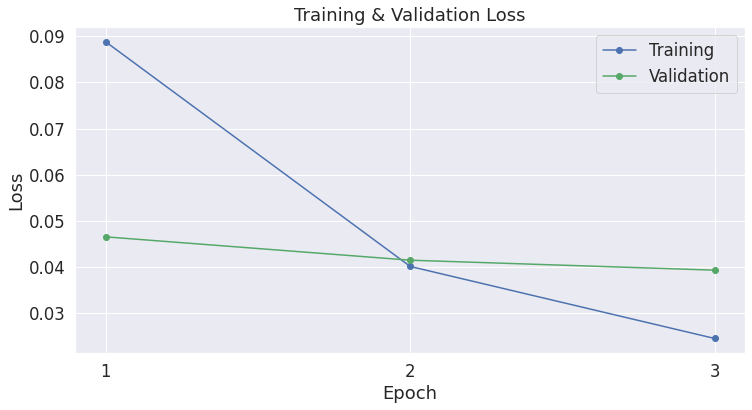

<Figure size 864x432 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])

plt.show()
plt.savefig('loss.png')

In [ ]:
# Load the dataset into a pandas dataframe.
df_test = pd.read_csv('grammer_error_dataset/test.csv')

print('Number of test sentences: {:,}\n'.format(df_test.shape[0]))


sentences = df_test.abstracts.values
labels_test = df_test[['err_1','err_2','err_3','err_4','err_5']].values


input_ids_test = []
attention_masks_test = []

# For every sentence...
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 64,          
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',    
                   )
     
    input_ids_test.append(encoded_dict['input_ids'])
    
 
    attention_masks_test.append(encoded_dict['attention_mask'])

input_ids_test = torch.cat(input_ids_test, dim=0)
attention_masks_test = torch.cat(attention_masks_test, dim=0)
labels_test = torch.tensor(labels_test)
 
batch_size = 16

prediction_data = TensorDataset(input_ids_test, attention_masks_test, labels_test)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 697



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2299: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
import torch
model = torch.load('/content/drive/MyDrive/Colab Notebooks/thesis_PQAI/ged-fg.model')

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids_test)))
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:

  b_input_ids = batch[0].to(device)
  b_input_mask = batch[1].to(device)
  b_labels = batch[2].to(device)
  
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      
      outputs = model(ids =b_input_ids,masks=b_input_mask,labels=b_labels)
      logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

Predicting labels for 697 test sentences...


In [ ]:
with torch.no_grad():
    outputs = model(ids =input_ids_test.to(device),masks=attention_masks_test.to(device),labels=labels_test.to(device))
    logits = outputs[1]
preds = logits.detach().cpu().numpy()
test_label_ids = labels_test.to('cpu').numpy()

In [ ]:
pred_hard = 1 * (preds > 0.5)
accuracy_score(test_label_ids,pred_hard)

0.93974175035868

In [ ]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix,recall_score,precision_score,f1_score,average_precision_score,jaccard_score,hamming_loss,accuracy_score

In [ ]:
print(classification_report(test_label_ids,pred_hard))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        51
           1       0.90      0.87      0.89        54
           2       0.92      0.89      0.91        55
           3       1.00      0.87      0.93        52
           4       0.98      0.98      0.98        51

   micro avg       0.94      0.89      0.91       263
   macro avg       0.94      0.89      0.91       263
weighted avg       0.94      0.89      0.91       263
 samples avg       0.21      0.20      0.20       263



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = multilabel_confusion_matrix(test_label_ids,pred_hard)
labels = ['Err_1','err_2','err_3','err_4','err_5']

In [ ]:
cm

array([[[641,   5],
        [  8,  43]],

       [[638,   5],
        [  7,  47]],

       [[638,   4],
        [  6,  49]],

       [[645,   0],
        [  7,  45]],

       [[645,   1],
        [  1,  50]]])

###**3. Baseline - Official implementation**

In [ ]:
import re

In [ ]:
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [ ]:
def batch_iter(data, batch_size, num_epochs, shuffle=True):
    """
    Generates a batch iterator for a dataset.
    """
    data = np.array(data)
    data_size = len(data)
    num_batches_per_epoch = int((len(data)-1)/batch_size) + 1
    for epoch in range(num_epochs):
        # Shuffle the data at each epoch
        if shuffle:
            shuffle_indices = np.random.permutation(np.arange(data_size))
            shuffled_data = data[shuffle_indices]
        else:
            shuffled_data = data
        for batch_num in range(num_batches_per_epoch):
            start_index = batch_num * batch_size
            end_index = min((batch_num + 1) * batch_size, data_size)
            yield shuffled_data[start_index:end_index]

In [ ]:
class TextCNN(object):
    """
    A CNN for text classification.
    Uses an embedding layer, followed by a convolutional, max-pooling and softmax layer.
    """
    def __init__(
      self, sequence_length, num_classes, vocab_size,
      embedding_size, filter_sizes, num_filters, l2_reg_lambda=0.0):

        # Placeholders for input, output and dropout
        self.input_x = tf.placeholder(tf.int32, [None, sequence_length], name="input_x")
        self.input_y = tf.placeholder(tf.float32, [None, num_classes], name="input_y")
        self.dropout_keep_prob = tf.placeholder(tf.float32, name="dropout_keep_prob")

        # Keeping track of l2 regularization loss (optional)
        l2_loss = tf.constant(0.0)

        # Embedding layer
        with tf.device('/cpu:0'), tf.name_scope("embedding"):
            self.W = tf.Variable(
                tf.random_uniform([vocab_size, embedding_size], -1.0, 1.0),
                name="W")
            self.embedded_chars = tf.nn.embedding_lookup(self.W, self.input_x)
            self.embedded_chars_expanded = tf.expand_dims(self.embedded_chars, -1)

        # Create a convolution + maxpool layer for each filter size
        pooled_outputs = []
        for i, filter_size in enumerate(filter_sizes):
            with tf.name_scope("conv-maxpool-%s" % filter_size):
                # Convolution Layer
                filter_shape = [filter_size, embedding_size, 1, num_filters]
                W = tf.Variable(tf.truncated_normal(filter_shape, stddev=0.1), name="W")
                b = tf.Variable(tf.constant(0.1, shape=[num_filters]), name="b")
                conv = tf.nn.conv2d(
                    self.embedded_chars_expanded,
                    W,
                    strides=[1, 1, 1, 1],
                    padding="VALID",
                    name="conv")
                # Apply nonlinearity
                h = tf.nn.relu(tf.nn.bias_add(conv, b), name="relu")
                # Maxpooling over the outputs
                pooled = tf.nn.max_pool(
                    h,
                    ksize=[1, sequence_length - filter_size + 1, 1, 1],
                    strides=[1, 1, 1, 1],
                    padding='VALID',
                    name="pool")
                pooled_outputs.append(pooled)

        # Combine all the pooled features
        num_filters_total = num_filters * len(filter_sizes)
        self.h_pool = tf.concat(pooled_outputs, 3)
        self.h_pool_flat = tf.reshape(self.h_pool, [-1, num_filters_total])

        # Add dropout
        with tf.name_scope("dropout"):
            self.h_drop = tf.nn.dropout(self.h_pool_flat, self.dropout_keep_prob)

        # Final (unnormalized) scores and predictions
        with tf.name_scope("output"):
            W = tf.get_variable(
                "W",
                shape=[num_filters_total, num_classes],
                initializer=tf.contrib.layers.xavier_initializer())
            b = tf.Variable(tf.constant(0.1, shape=[num_classes]), name="b")
            l2_loss += tf.nn.l2_loss(W)
            l2_loss += tf.nn.l2_loss(b)
            self.scores = tf.nn.xw_plus_b(self.h_drop, W, b, name="scores")
            self.predictions = tf.argmax(self.scores, 1, name="predictions")

        # Calculate mean cross-entropy loss
        with tf.name_scope("loss"):
            losses = tf.nn.softmax_cross_entropy_with_logits(logits=self.scores, labels=self.input_y)
            self.loss = tf.reduce_mean(losses) + l2_reg_lambda * l2_loss

        # Accuracy
        with tf.name_scope("accuracy"):
            correct_predictions = tf.equal(self.predictions, tf.argmax(self.input_y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"), name="accuracy")

In [ ]:
import os
import time
import datetime
from tensorflow.contrib import learn

In [ ]:
# Parameters
# ==================================================

# Data loading params
tf.flags.DEFINE_float("dev_sample_percentage", .1, "Percentage of the training data to use for validation")
tf.flags.DEFINE_string("positive_data_file", "./data/rt-polaritydata/rt-polarity.pos", "Data source for the positive data.")
tf.flags.DEFINE_string("negative_data_file", "./data/rt-polaritydata/rt-polarity.neg", "Data source for the negative data.")

# Model Hyperparameters
tf.flags.DEFINE_integer("embedding_dim", 128, "Dimensionality of character embedding (default: 128)")
tf.flags.DEFINE_string("filter_sizes", "3,4,5", "Comma-separated filter sizes (default: '3,4,5')")
tf.flags.DEFINE_integer("num_filters", 128, "Number of filters per filter size (default: 128)")
tf.flags.DEFINE_float("dropout_keep_prob", 0.5, "Dropout keep probability (default: 0.5)")
tf.flags.DEFINE_float("l2_reg_lambda", 0.0, "L2 regularization lambda (default: 0.0)")

# Training parameters
tf.flags.DEFINE_integer("batch_size", 64, "Batch Size (default: 64)")
tf.flags.DEFINE_integer("num_epochs", 200, "Number of training epochs (default: 200)")
tf.flags.DEFINE_integer("evaluate_every", 100, "Evaluate model on dev set after this many steps (default: 100)")
tf.flags.DEFINE_integer("checkpoint_every", 100, "Save model after this many steps (default: 100)")
tf.flags.DEFINE_integer("num_checkpoints", 5, "Number of checkpoints to store (default: 5)")
# Misc Parameters
tf.flags.DEFINE_boolean("allow_soft_placement", True, "Allow device soft device placement")
tf.flags.DEFINE_boolean("log_device_placement", False, "Log placement of ops on devices")
FLAGS = tf.flags.FLAGS

In [ ]:
def preprocess():
    # Data Preparation
    # ==================================================

    # Load data
    #print("Loading data...")
    #x_text, y = data_helpers.load_data_and_labels(FLAGS.positive_data_file, FLAGS.negative_data_file)

    x_train = df_train.abstracts.values
    x_train = [clean_str(sent) for sent in x_train]
    y_train = np.eye(2)[df_train.grammatically_incorrect.values]
    x_dev = df_val.abstracts.values
    x_dev = [clean_str(sent) for sent in x_dev]
    y_dev = np.eye(2)[df_val.grammatically_incorrect.values]

    # Build vocabulary
    max_document_length = 250
    vocab_processor = learn.preprocessing.VocabularyProcessor(max_document_length)
    #sent_for_vocab = np.concatenate((x_train,x_dev))

    x_train = np.array(list(vocab_processor.fit_transform(x_train)))
    x_dev = np.array(list(vocab_processor.fit_transform(x_dev)))

    # Randomly shuffle data
    #np.random.seed(10)
    #shuffle_indices = np.random.permutation(np.arange(len(y)))
    #x_shuffled = x[shuffle_indices]
    #y_shuffled = y[shuffle_indices]

    # Split train/test set
    # TODO: This is very crude, should use cross-validation
    #dev_sample_index = -1 * int(FLAGS.dev_sample_percentage * float(len(y)))
    #x_train, x_dev = x_shuffled[:dev_sample_index], x_shuffled[dev_sample_index:]
    #y_train, y_dev = y_shuffled[:dev_sample_index], y_shuffled[dev_sample_index:]

    #del x, y, x_shuffled, y_shuffled

    #print("Vocabulary Size: {:d}".format(len(vocab_processor.vocabulary_)))
    #print("Train/Dev split: {:d}/{:d}".format(len(y_train), len(y_dev)))
    return x_train, y_train, vocab_processor, x_dev, y_dev

In [ ]:
val_losses = []
val_accs = []
train_losses = []
train_accs = []

In [ ]:
def train(x_train, y_train, vocab_processor, x_dev, y_dev):
    # Training
    # ==================================================

    with tf.Graph().as_default():
        session_conf = tf.ConfigProto(
          allow_soft_placement=True,
          log_device_placement=False)
        sess = tf.Session(config=session_conf)
        with sess.as_default():
            cnn = TextCNN(
                sequence_length=x_train.shape[1],
                num_classes=y_train.shape[1],
                vocab_size=len(vocab_processor.vocabulary_),
                embedding_size=128,
                filter_sizes=list(map(int, [3,4,5])),
                num_filters=128,
                l2_reg_lambda=0.0)

            # Define Training procedure
            global_step = tf.Variable(0, name="global_step", trainable=False)
            optimizer = tf.train.AdamOptimizer(1e-3)
            grads_and_vars = optimizer.compute_gradients(cnn.loss)
            train_op = optimizer.apply_gradients(grads_and_vars, global_step=global_step)

            # Keep track of gradient values and sparsity (optional)
            grad_summaries = []
            for g, v in grads_and_vars:
                if g is not None:
                    grad_hist_summary = tf.summary.histogram("{}/grad/hist".format(v.name), g)
                    sparsity_summary = tf.summary.scalar("{}/grad/sparsity".format(v.name), tf.nn.zero_fraction(g))
                    grad_summaries.append(grad_hist_summary)
                    grad_summaries.append(sparsity_summary)
            grad_summaries_merged = tf.summary.merge(grad_summaries)

            # Output directory for models and summaries
            timestamp = str(int(time.time()))
            out_dir = os.path.abspath(os.path.join(os.path.curdir, "runs", timestamp))
            print("Writing to {}\n".format(out_dir))

            # Summaries for loss and accuracy
            loss_summary = tf.summary.scalar("loss", cnn.loss)
            acc_summary = tf.summary.scalar("accuracy", cnn.accuracy)

            # Train Summaries
            train_summary_op = tf.summary.merge([loss_summary, acc_summary, grad_summaries_merged])
            train_summary_dir = os.path.join(out_dir, "summaries", "train")
            train_summary_writer = tf.summary.FileWriter(train_summary_dir, sess.graph)

            # Dev summaries
            dev_summary_op = tf.summary.merge([loss_summary, acc_summary])
            dev_summary_dir = os.path.join(out_dir, "summaries", "dev")
            dev_summary_writer = tf.summary.FileWriter(dev_summary_dir, sess.graph)

            # Checkpoint directory. Tensorflow assumes this directory already exists so we need to create it
            checkpoint_dir = os.path.abspath(os.path.join(out_dir, "checkpoints"))
            checkpoint_prefix = os.path.join(checkpoint_dir, "model")
            if not os.path.exists(checkpoint_dir):
                os.makedirs(checkpoint_dir)
            saver = tf.train.Saver(tf.global_variables(), max_to_keep=5)

            # Write vocabulary
            vocab_processor.save(os.path.join(out_dir, "vocab"))

            # Initialize all variables
            sess.run(tf.global_variables_initializer())

            def train_step(x_batch, y_batch):
                """
                A single training step
                """
                feed_dict = {
                  cnn.input_x: x_batch,
                  cnn.input_y: y_batch,
                  cnn.dropout_keep_prob: 0.5
                }
                _, step, summaries, loss, accuracy = sess.run(
                    [train_op, global_step, train_summary_op, cnn.loss, cnn.accuracy],
                    feed_dict)
                train_losses.append(loss)
                train_accs.append(accuracy)
                time_str = datetime.datetime.now().isoformat()
                
                print("{}: step {}, loss {:g}, acc {:g}".format(time_str, step, loss, accuracy))
                train_summary_writer.add_summary(summaries, step)

            def dev_step(x_batch, y_batch, writer=None):
                """
                Evaluates model on a dev set
                """
                feed_dict = {
                  cnn.input_x: x_batch,
                  cnn.input_y: y_batch,
                  cnn.dropout_keep_prob: 1.0
                }
                step, summaries, loss, accuracy = sess.run(
                    [global_step, dev_summary_op, cnn.loss, cnn.accuracy],
                    feed_dict)
                val_losses.append(loss)
                val_accs.append(accuracy)
                time_str = datetime.datetime.now().isoformat()
                print("{}: step {}, loss {:g}, acc {:g}".format(time_str, step, loss, accuracy))
                if writer:
                    writer.add_summary(summaries, step)

            # Generate batches
            batches = batch_iter(
                list(zip(x_train, y_train)), 64, 50)
            # Training loop. For each batch...
            for batch in batches:
              
                x_batch, y_batch = zip(*batch)
                train_step(x_batch, y_batch)
                current_step = tf.train.global_step(sess, global_step)
                if current_step % 100 == 0:
                    print("\nEvaluation:")
                    dev_step(x_dev, y_dev, writer=dev_summary_writer)
                    print("")
                if current_step % 100 == 0:
                    path = saver.save(sess, checkpoint_prefix, global_step=current_step)
                    print("Saved model checkpoint to {}\n".format(path))

In [ ]:
x_train, y_train, vocab_processor, x_dev, y_dev = preprocess()

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.


In [ ]:
train(x_train, y_train, vocab_processor, x_dev, y_dev)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

INFO:tensorflow:Summary name embedding/W:0/grad/hist is illegal; using embedding/W_0/grad/hist instead.
INFO:tensorflow:Summary name embedding/W:0/grad/sparsity is illegal; using embedding/W_0/grad/sparsity instead.
INFO:tensorflow:Summary name conv-maxpool-3/W:0/grad/hist is illegal; using conv-maxpool-3/W_0/grad/hist instead.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


Streaming output truncated to the last 5000 lines.
2022-03-25T10:31:24.816743: step 4989, loss 0.00177542, acc 1
2022-03-25T10:31:24.966374: step 4990, loss 0.000221838, acc 1
2022-03-25T10:31:25.127160: step 4991, loss 0.0012879, acc 1
2022-03-25T10:31:25.272311: step 4992, loss 0.00334632, acc 1
2022-03-25T10:31:25.425638: step 4993, loss 0.0156785, acc 1
2022-03-25T10:31:25.571941: step 4994, loss 0.00308173, acc 1
2022-03-25T10:31:25.719924: step 4995, loss 0.00150071, acc 1
2022-03-25T10:31:25.872771: step 4996, loss 0.000475497, acc 1
2022-03-25T10:31:26.025745: step 4997, loss 0.00113114, acc 1
2022-03-25T10:31:26.175061: step 4998, loss 0.00108887, acc 1
2022-03-25T10:31:26.321976: step 4999, loss 0.00112564, acc 1
2022-03-25T10:31:26.470677: step 5000, loss 0.000645797, acc 1

Evaluation:
2022-03-25T10:31:26.612773: step 5000, loss 0.494102, acc 0.921512

Saved model checkpoint to /content/runs/1648203506/checkpoints/model-5000

2022-03-25T10:31:26.883154: step 5001, loss 0.03

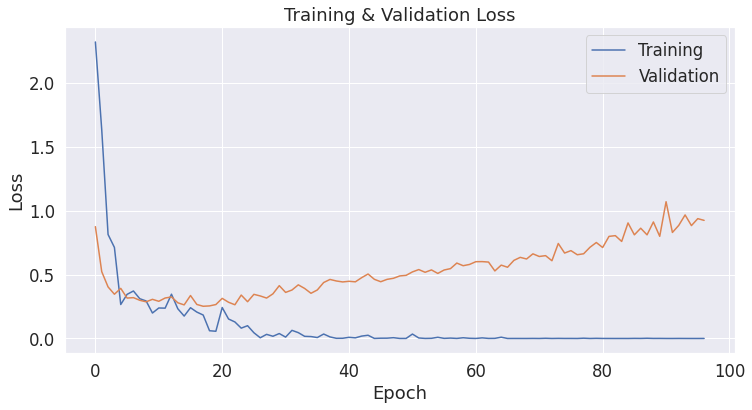

<Figure size 864x432 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(train_losses[::100], label="Training")
plt.plot(val_losses, label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()
plt.savefig('loss.png',bbox_inches='tight')

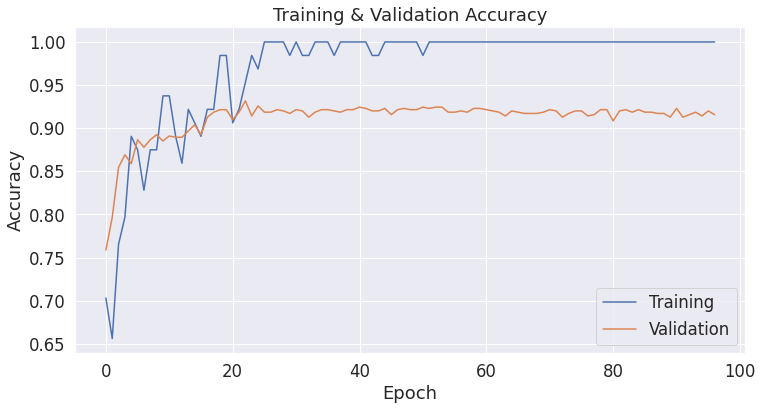

In [ ]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(train_accs[::100], label="Training")
plt.plot(val_accs, label="Validation")

# Label the plot.
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
len(train_losses)

9700

In [ ]:
import os
import time
import datetime
from tensorflow.contrib import learn
import csv

In [ ]:
#tf.flags.DEFINE_string("positive_data_file", "./data/rt-polaritydata/rt-polarity.pos", "Data source for the positive data.")
#tf.flags.DEFINE_string("negative_data_file", "./data/rt-polaritydata/rt-polarity.neg", "Data source for the negative data.")

# Eval Parameters
tf.flags.DEFINE_integer("batch_size", 64, "Batch Size (default: 64)")
tf.flags.DEFINE_string("checkpoint_dir", "", "Checkpoint directory from training run")
tf.flags.DEFINE_boolean("eval_train", False, "Evaluate on all training data")

# Misc Parameters
tf.flags.DEFINE_boolean("allow_soft_placement", True, "Allow device soft device placement")
tf.flags.DEFINE_boolean("log_device_placement", False, "Log placement of ops on devices")


FLAGS = tf.flags.FLAGS
FLAGS._parse_flags()
print("\nParameters:")
for attr, value in sorted(FLAGS.__flags.items()):
    print("{}={}".format(attr.upper(), value))
print("")

DuplicateFlagError: ignored

In [ ]:
# CHANGE THIS: Load data. Load your own data here
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/thesis_PQAI/grammer_error_dataset/test.csv')
x_raw = df_test.abstracts.values
y_test = np.eye(2)[df_test.grammatically_incorrect.values]

In [ ]:
# Map data into vocabulary
vocab_path = os.path.join('/content/runs/1648203506/checkpoints', "..", "vocab")
vocab_processor = learn.preprocessing.VocabularyProcessor.restore(vocab_path)
x_test = np.array(list(vocab_processor.transform(x_raw)))

In [ ]:
print("\nEvaluating...\n")

# Evaluation
# ==================================================
checkpoint_file = tf.train.latest_checkpoint('/content/runs/1648203506/checkpoints')
graph = tf.Graph()
with graph.as_default():
    session_conf = tf.ConfigProto(
      allow_soft_placement=True,
      log_device_placement=False)
    sess = tf.Session(config=session_conf)
    with sess.as_default():
        # Load the saved meta graph and restore variables
        saver = tf.train.import_meta_graph("{}.meta".format(checkpoint_file))
        saver.restore(sess, checkpoint_file)

        # Get the placeholders from the graph by name
        input_x = graph.get_operation_by_name("input_x").outputs[0]
        # input_y = graph.get_operation_by_name("input_y").outputs[0]
        dropout_keep_prob = graph.get_operation_by_name("dropout_keep_prob").outputs[0]

        # Tensors we want to evaluate
        predictions = graph.get_operation_by_name("output/predictions").outputs[0]

        # Generate batches for one epoch
        batches = batch_iter(list(x_test), 64, 1, shuffle=False)

        # Collect the predictions here
        all_predictions = []

        for x_test_batch in batches:
            batch_predictions = sess.run(predictions, {input_x: x_test_batch, dropout_keep_prob: 1.0})
            all_predictions = np.concatenate([all_predictions, batch_predictions])


Evaluating...

INFO:tensorflow:Restoring parameters from /content/runs/1648203506/checkpoints/model-9700


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
accuracy_score(np.argmax(y_test,axis=1),all_predictions)

0.9010043041606887

In [ ]:
precision_score(np.argmax(y_test,axis=1),all_predictions)

0.8201438848920863

In [ ]:
recall_score(np.argmax(y_test,axis=1),all_predictions)

0.7215189873417721

In [ ]:
f1_score(np.argmax(y_test,axis=1),all_predictions)

0.7676767676767676

In [ ]:
cm = confusion_matrix(np.argmax(y_test,axis=1),all_predictions)
cm

array([[514,  25],
       [ 44, 114]])

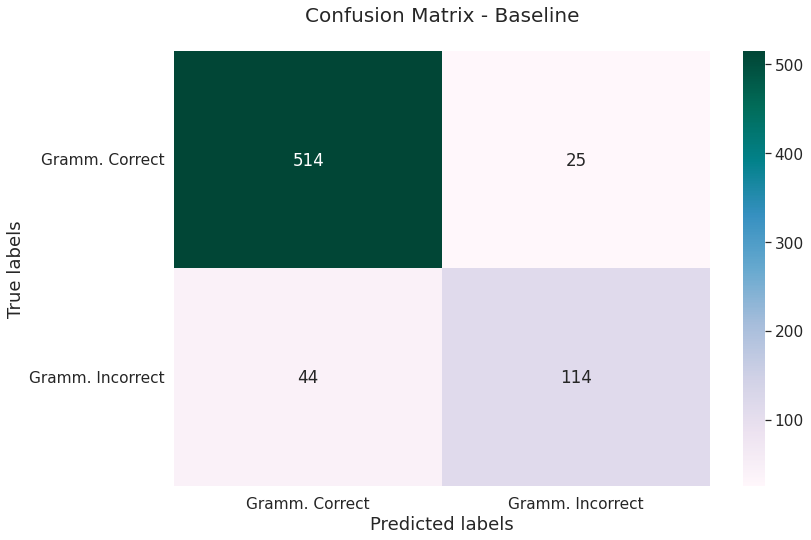

In [ ]:
plt.figure(figsize=(12,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='PuBuGn'); #annot=True to annotate cells
sns.set(font_scale=1.4)
# labels, title and ticks
ax.set_xlabel('Predicted labels').set_fontsize('18')
ax.set_ylabel('True labels').set_fontsize('18')
ax.set_title('Confusion Matrix - Baseline',pad = 30).set_fontsize('20')
ax.xaxis.set_ticklabels(['Gramm. Correct','Gramm. Incorrect'],rotation=0)
ax.yaxis.set_ticklabels(['Gramm. Correct','Gramm. Incorrect'],rotation=0)
plt.savefig('cm.png',bbox_inches='tight')